# k-NN 

**File:** kNNSolution.ipynb

**Course:** Data Science Foundations: Data Mining in Python

# IMPORT LIBRARIES

In [1]:
import matplotlib.pyplot as plt                      # For plotting data
import seaborn as sns                                # For plotting data
import pandas as pd                                  # For dataframes
from sklearn.model_selection import GridSearchCV     # For parameter optimization
from sklearn.neighbors import KNeighborsClassifier   # For kNN classification
from sklearn.metrics import plot_confusion_matrix    # Evaluation measure

# LOAD AND PREPARE DATA

Many of the datasets for this course come from the Machine Learning Repository at the University of California, Irvine (UCI) at [https://archive.ics.uci.edu/](https://archive.ics.uci.edu/).

For this challenge, we'll use the "Breast Cancer Wisconsin (Original) Data Set," which can be found at [https://j.mp/2NsaIlc](https://j.mp/2NsaIlc). To save time, I have already prepared the dataset by doing the following:

- Removed the variable `Id`.
- Renamed the attribute variables to `X0` through `X8`.
- Renamed the variable `class` to `y`.
- Converted all attribute variables from categorical to numeric.
- Dropped cases with missing values.
- Split the data into training (70%) and testing (30%) datasets.

This makes it possible to directly load the prepared training and testing datasets below.

## Import Data

In [2]:
# Imports the training data
trn = pd.read_csv('BreastCancer_trn.csv')

# Separates the attributes X0-X8 into X_trn
X_trn = trn.filter(regex='\d')

# Separates the class variable into y_trn
y_trn = trn.y

# Imports the testing data
tst = pd.read_csv('BreastCancer_tst.csv')

# Separates the attributes X0-X8 into X_tst
X_tst = tst.filter(regex='\d')

# Separates the class variable into y_tst
y_tst = tst.y

# Class labels
diagnosis = ['Benign','Malignant']

Look at the first few rows of the training data.

In [3]:
trn.head()

,X0,X1,X2,X3,X4,X5,X6,X7,X8,y
0,3,1,1,1,3,2,1,1,1,benign
1,5,1,3,1,2,1,2,1,1,benign
2,7,5,6,10,4,10,5,3,1,malignant
3,1,1,1,3,1,3,1,1,1,benign
4,2,1,1,1,3,1,2,1,1,benign


# kNN: TRAIN MODEL
To train a kNN model, set up a `KNeighborsClassifier` object and fit it to training data.

In [4]:
# Sets up a kNN model and fits it to data
knn = KNeighborsClassifier(n_neighbors=5) \
    .fit(X_trn, y_trn)

## Calculate Mean Accuracy on Training Data

In [5]:
print(
    'Accuracy on training data: ' 
    + str("{:.2%}".format(knn.score(X_trn, y_trn))))

Accuracy on training data: 97.91%


## Optimize the kNN Model
The challenge in training a kNN model is to determine the optimal number of neighbors. To find the optimal parameters, `GridSearchCV` object can be used.

In [6]:
# Sets up the kNN classifier object
knn = KNeighborsClassifier() 

# Search parameters
param = range(3, 15, 2)

# Sets up GridSearchCV object and stores it in grid variable
grid = GridSearchCV(
    knn,
    {'n_neighbors': param})

# Fits the grid object and gets the best model
best_knn = grid \
    .fit(X_trn,y_trn) \
    .best_estimator_

# Displays the optimum model
best_knn.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 13,
 'p': 2,
 'weights': 'uniform'}

## Plot the Accuracy for Various Parameters
Once the optimal parameters are found, the accuracy for different parameters can be compared by plotting. The `grid` variable has an attribute `cv_results_`, which is a dictionary of key value pairs and stores the cross validation accuracy for each parameter.

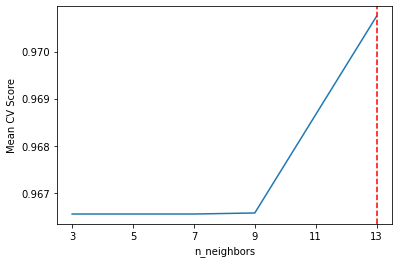

In [7]:
# Plots mean_test_scores vs. total neighbors
plt.plot(
    param,
    grid.cv_results_['mean_test_score'])

# Adds labels to the plot
plt.xticks(param)
plt.ylabel('Mean CV Score')
plt.xlabel('n_neighbors')

# Draws a vertical line where the best model is
plt.axvline(
    x=best_knn.n_neighbors, 
    color='red', 
    ls='--')

# TEST MODEL
In this phase, we'll evaluate the accuracy of the trained kNN model on the test set. A good evaluation measure is the `confusion matrix` that gives the fraction of true positives, true negatives, false positives, and false negatives.

## Visualize the Confusion Matrix

Normalize the scores to display as proportions across rows.

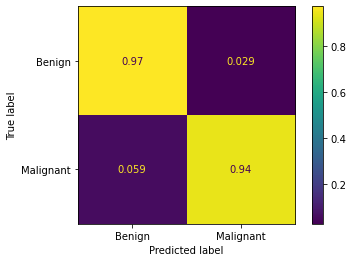

In [8]:
plot_confusion_matrix(
    best_knn, X_tst, y_tst,
    display_labels=diagnosis,
    normalize='true')

## Calculate Mean Accuracy on Testing Data

In [9]:
print(
    'Accuracy on testing data: ' 
    + str("{:.2%}".format(best_knn.score(X_tst, y_tst))))

Accuracy on testing data: 96.10%
